In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
learning_rate = 0.01
epochs = 1000
display_step = 50

In [4]:
# Linear Regression
# y = WX + b
# X N * 1 
# b N * 1
# W n_features * n_output
# b n_output

In [5]:
np.random.seed(77)
tf.set_random_seed(77)
# Create fake linear function data
n_samples = 100
n_features = 1
n_output = 1 
minval = -1
maxval = 1
slope = np.array([[3.0]], dtype='float32')
intercept = np.array([[1.0]],dtype='float32')
noise  = np.random.normal(0, 0.2, size = [n_samples, 1]).astype('float32')
X = np.linspace(minval,maxval,n_samples * n_features, dtype='float32').reshape([n_samples,n_features])
y = (np.matmul(X, slope) + intercept + noise).reshape([n_samples, n_output])

In [6]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

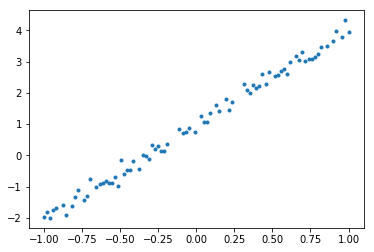

In [7]:
plt.plot(X_train, y_train, '.')

In [8]:
W = tf.Variable(tf.random_normal([n_features, n_output]), name= 'Weights')
b = tf.Variable(tf.zeros([n_output]), name = 'Biases')

In [9]:
tf_X = tf.placeholder(tf.float32, shape=[None, n_features])
tf_y = tf.placeholder(tf.float32, shape=[None, n_output])
output = tf.add(tf.matmul(tf_X,W),b)

In [10]:
cost = tf.reduce_mean(tf.square(tf.subtract(tf_y, output)))
#loss = tf.losses.mean_squared_error(tf_y, output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
test_error = tf.metrics.mean_absolute_error(y_test, output)

In [11]:
session = tf.Session()
init = tf.global_variables_initializer()
local = tf.local_variables_initializer()
session.run(init)
session.run(local)

In [12]:
for epoch in range(epochs):
    
    _, _cost, _output = session.run([optimizer, cost, output], feed_dict={tf_X: X_train, tf_y: y_train})
    
    if epoch % display_step ==0:
        
        print('epoch : {}'.format(epoch) , 'W: {}'.format(session.run(W)), 
              'b: {}'.format(session.run(b)), 'Cost: {}'.format(_cost))

epoch : 0 W: [[1.0280392]] b: [0.01948889] Cost: 2.3989548683166504
epoch : 50 W: [[1.6154332]] b: [0.62915176] Cost: 0.8663451075553894
epoch : 100 W: [[2.0324378]] b: [0.85444456] Cost: 0.39847874641418457
epoch : 150 W: [[2.3273277]] b: [0.938807] Cost: 0.2051745355129242
epoch : 200 W: [[2.5354476]] b: [0.97116613] Cost: 0.11443642526865005
epoch : 250 W: [[2.6821785]] b: [0.98410493] Cost: 0.07011304795742035
epoch : 300 W: [[2.7855732]] b: [0.9896307] Cost: 0.04821991175413132
epoch : 350 W: [[2.8584101]] b: [0.99221635] Cost: 0.037373460829257965
epoch : 400 W: [[2.9097152]] b: [0.9935616] Cost: 0.031995248049497604
epoch : 450 W: [[2.9458494]] b: [0.9943361] Cost: 0.029328029602766037
epoch : 500 W: [[2.9712987]] b: [0.9948184] Cost: 0.02800513431429863
epoch : 550 W: [[2.9892223]] b: [0.99513537] Cost: 0.027349000796675682
epoch : 600 W: [[3.001845]] b: [0.99535] Cost: 0.02702357992529869
epoch : 650 W: [[3.0107353]] b: [0.9954981] Cost: 0.026862168684601784
epoch : 700 W: [[3

In [14]:
session.run(tf.reduce_mean(tf.square(W * np.array([[1]]) + b - np.array([[2]]))))
session.run([output, cost], feed_dict={tf_X : np.array([[1]]), tf_y : np.array([[2]])})

[array([[4.0258875]], dtype=float32), 4.10422]

In [15]:
test_pred, test_cost = session.run([output, cost], feed_dict={tf_X : X_test, tf_y : y_test})

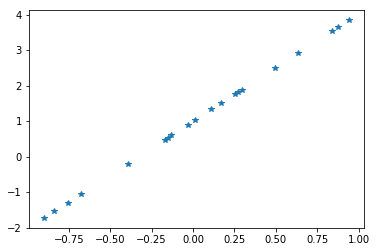

In [16]:
plt.plot(X_test, test_pred, '*')

In [17]:
metrics.r2_score(y_test, test_pred)

0.9808712996043218

In [18]:
metrics.mean_absolute_error(y_test, test_pred)

0.20262237

In [21]:
session.run(test_error, feed_dict= {tf_X: X_test})

(0.20262237, 0.20262237)

In [29]:
np.concatenate([y_test, test_pred], axis=1)

array([[-2.0919116 , -1.728189  ],
       [ 3.7609527 ,  3.658606  ],
       [ 0.27843565,  0.4754998 ],
       [ 4.1362557 ,  3.8422468 ],
       [-1.2875261 , -1.0548396 ],
       [ 0.5117779 ,  0.53671336],
       [ 3.2036912 ,  2.924043  ],
       [ 3.4882793 ,  3.5361788 ],
       [ 0.6848622 ,  1.026422  ],
       [ 1.2337593 ,  1.5161307 ],
       [ 1.4994389 ,  1.33249   ],
       [ 1.6486175 ,  1.7609849 ],
       [ 2.5229785 ,  2.495548  ],
       [ 2.4603977 ,  1.8834121 ],
       [-1.2014722 , -1.5445483 ],
       [ 0.9130817 ,  0.90399486],
       [ 1.9417639 ,  1.8221986 ],
       [-1.4825463 , -1.2996941 ],
       [-0.4262193 , -0.19784957],
       [ 0.7174484 ,  0.597927  ]], dtype=float32)